<a href="https://colab.research.google.com/github/Pheasant-King/CAP4630/blob/master/HW2_Prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
width = 28
height = 28

def connected_components(image):
  visited = {}
  num_connected_components = 0
  
  def is_coordinate(x, y):
    if x < 0 or x >= width or y < 0 or y >= height:
      return False
    else:
      return True

  def is_white(x, y):
    return image[(x, y)] < 128
      
  def DepthFirst(x, y):
    # neighboring pixels
    for dx, dy in [(-1, 1), (0, 1), (1, 1), (-1, 0), (1, 0), (-1, -1), (0, -1), (1, -1)]:
      next_x = x + dx
      next_y = y + dy
      if is_coordinate(next_x, next_y) and is_white(next_x, next_y) and (next_x, next_y) not in visited:
        visited[(next_x, next_y)] = True
        DepthFirst(next_x, next_y)
        
  for x in range(width):
    for y in range(height):

      if is_white(x, y) and (x, y) not in visited:
        visited[(x, y)] = True
        num_connected_components = num_connected_components + 1
        DepthFirst(x, y)
  
  return num_connected_components

In [ ]:
def connected_components_to_vec(images):
  num_cc_array = np.zeros((len(images),), dtype=int)
  for index in np.arange(len(images)):
    num_cc_array[index] = connected_components(images[index])
  return num_cc_array

In [ ]:
train_num_connected_components = connected_components_to_vec(train_images)
test_num_connected_components = connected_components_to_vec(test_images)

In [ ]:
np.concatenate((train_labels, train_num_connected_components), axis=0)
np.concatenate((test_labels, test_num_connected_components), axis=0)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 15
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 79us/sample - loss: 2.4837 - acc: 0.3787 - val_loss: 1.1079 - val_acc: 0.6526
Epoch 2/15
60000/60000 [==============================] - 4s 64us/sample - loss: 1.1658 - acc: 0.6119 - val_loss: 0.7773 - val_acc: 0.7624
Epoch 3/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.9473 - acc: 0.6793 - val_loss: 0.6904 - val_acc: 0.7859
Epoch 4/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.8674 - acc: 0.7000 - val_loss: 0.5904 - val_acc: 0.8225
Epoch 5/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.8149 - acc: 0.7304 - val_loss: 0.5404 - val_acc: 0.8683
Epoch 6/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.7695 - acc: 0.7529 - val_loss: 0.4800 - val_acc: 0.8753
Epoch 7/15
60000/60000 [===========

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.4039 - acc: 0.9105
Test accuracy: 0.9105


In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

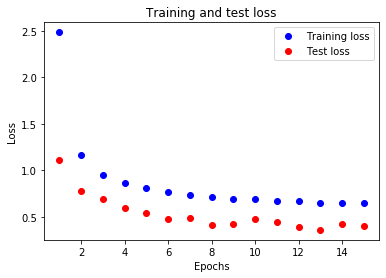

In [ ]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

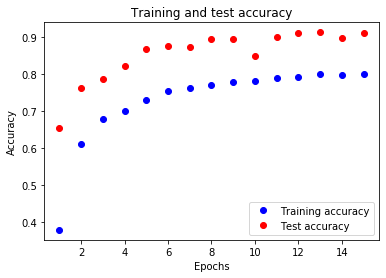

In [ ]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()